### Pokemon Classifier

In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
p = Path("Images/")

dirs = p.glob("*")
image_data = []
labels = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    # Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

Images\Bulbasaur
101
Images\Charmander
102
Images\Pikachu
101


In [3]:
import numpy as np

In [4]:
print(len(image_data))
print(len(labels))

304
304


In [5]:
import random
random.seed(10)

In [6]:
X = np.array(image_data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

(304, 40, 40, 3)
(304,)


In [7]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0

In [8]:
print(Y)

[1 0 1 1 0 0 1 1 2 1 0 1 2 2 2 2 0 2 0 0 2 2 0 2 0 1 2 2 0 1 2 2 0 0 0 0 2
 0 0 0 1 2 0 2 1 2 2 2 1 1 1 2 1 0 0 2 2 1 2 0 1 0 2 1 2 1 1 2 2 2 0 2 0 2
 1 1 2 2 2 2 0 1 1 0 2 2 1 1 2 2 1 0 0 2 1 1 2 2 1 1 0 2 1 2 2 0 0 2 0 1 2
 2 1 2 1 2 1 1 2 2 0 1 2 1 1 1 0 2 2 2 2 0 0 0 2 0 1 0 1 1 0 1 2 0 0 2 1 1
 0 1 2 2 0 2 0 0 2 0 1 2 2 0 0 2 1 0 0 2 1 0 0 0 2 0 0 2 1 0 1 2 0 0 0 1 0
 2 0 2 0 0 1 1 2 0 1 1 1 1 2 2 0 2 1 1 0 2 2 1 1 2 0 0 0 0 0 2 2 1 1 0 0 2
 2 0 0 2 1 0 0 2 1 0 2 0 1 1 0 1 2 0 1 1 2 1 1 0 2 1 1 1 2 1 0 0 1 1 1 1 1
 0 2 1 0 0 0 2 1 0 0 2 1 0 1 1 1 2 0 2 1 0 1 1 1 1 0 2 2 2 2 2 0 0 1 0 0 1
 2 0 1 0 1 1 1 2]


In [9]:
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

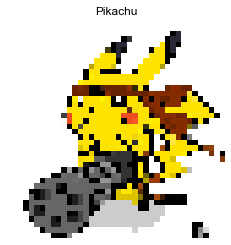

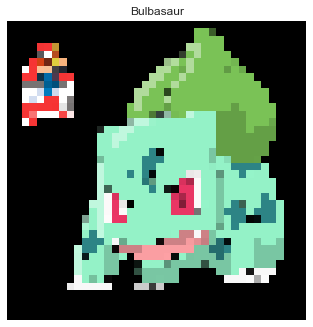

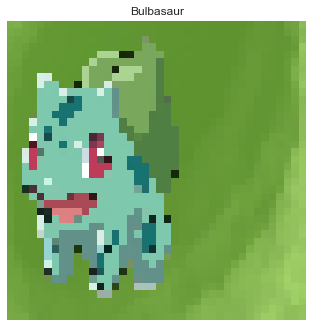

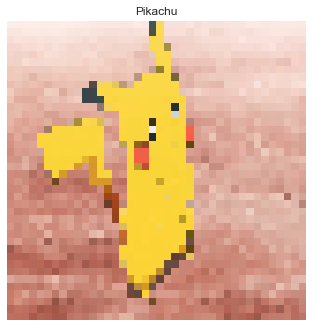

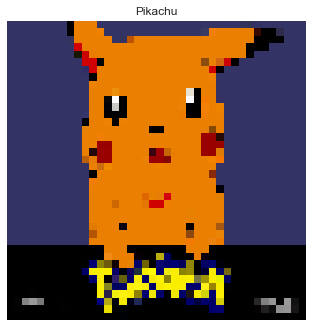

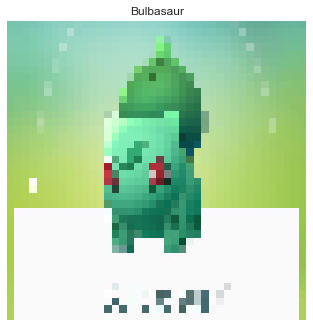

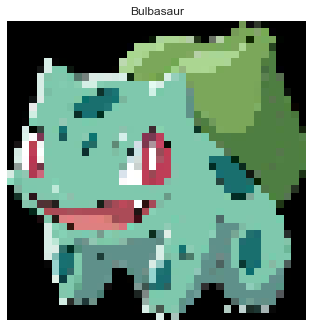

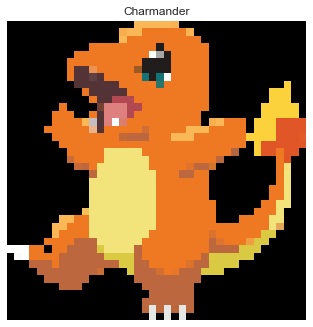

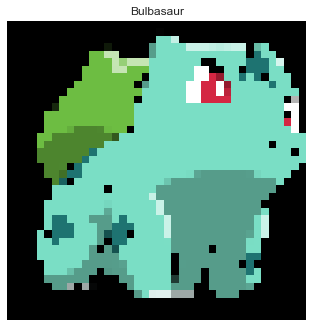

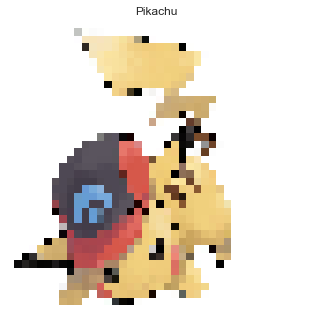

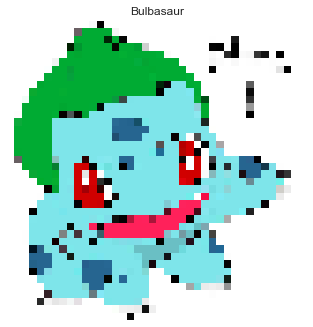

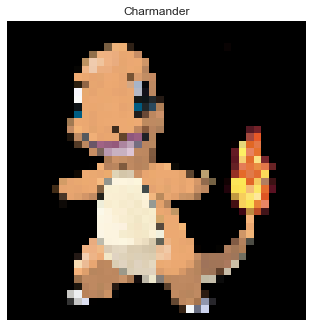

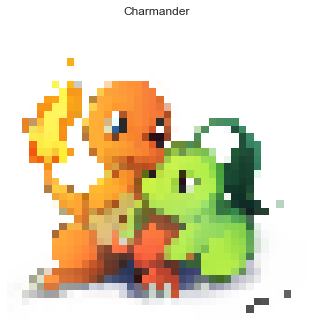

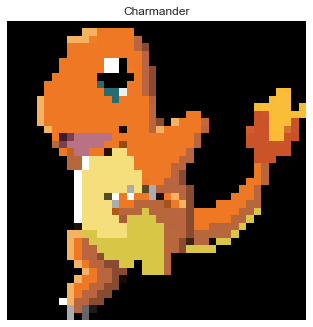

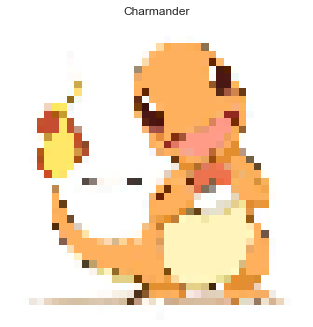

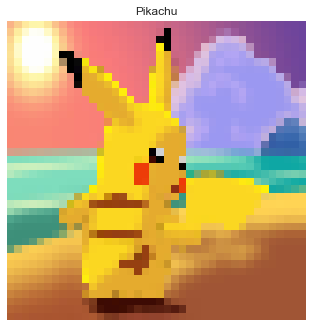

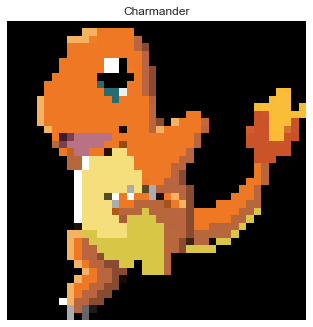

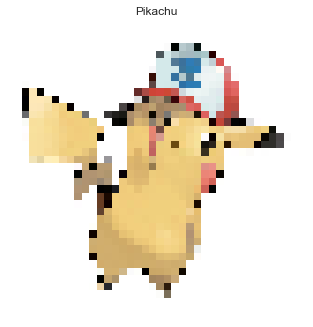

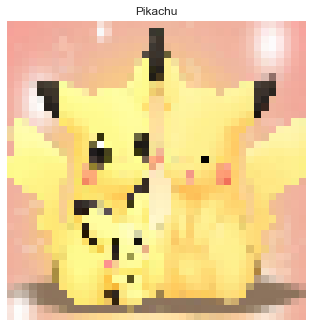

In [10]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i])

In [11]:
split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(243, 40, 40, 3) (243,)
(61, 40, 40, 3) (61,)


In [12]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} 
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        # Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

def softmax(a):
        e_pa = np.exp(a) 
        ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
        return ans
    

In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [15]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3)

In [16]:
print(X.shape)

(243, 40, 40, 3)


In [17]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(243, 4800)
(61, 4800)


In [18]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 2.5929
Epoch 50 Loss 0.2236
Epoch 100 Loss 0.1346
Epoch 150 Loss 0.0973
Epoch 200 Loss 0.0742
Epoch 250 Loss 0.0581
Epoch 300 Loss 0.0401
Epoch 350 Loss 0.0319
Epoch 400 Loss 0.0267
Epoch 450 Loss 0.0225


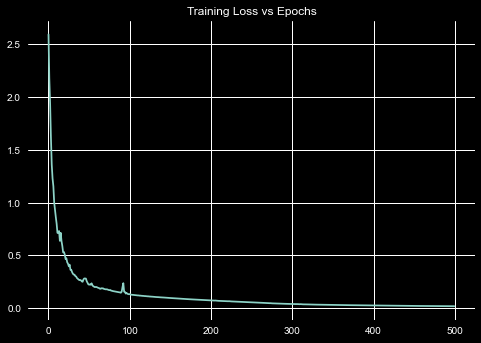

In [19]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [20]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9877
Test Acc 0.5738


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
from visualize import plot_confusion_matrix

In [24]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[82  2  0]
 [ 0 70  0]
 [ 0  1 88]]


Confusion matrix, without normalization
[[82  2  0]
 [ 0 70  0]
 [ 0  1 88]]


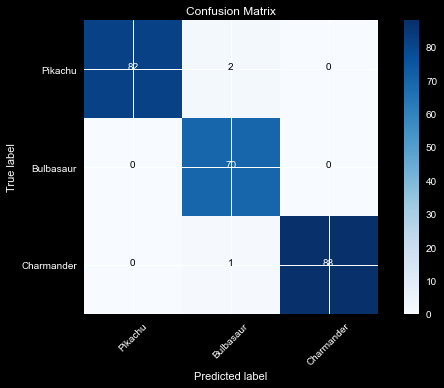

In [25]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Charmander"],title="Confusion Matrix")

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.96      1.00      0.98        70
           2       1.00      0.99      0.99        89

    accuracy                           0.99       243
   macro avg       0.99      0.99      0.99       243
weighted avg       0.99      0.99      0.99       243



              precision    recall  f1-score   support

           0       0.74      0.61      0.67        23
           1       0.54      0.83      0.65        18
           2       0.43      0.30      0.35        20

    accuracy                           0.57        61
   macro avg       0.57      0.58      0.56        61
weighted avg       0.58      0.57      0.56        61

Confusion matrix, without normalization
[[14  3  6]
 [ 1 15  2]
 [ 4 10  6]]


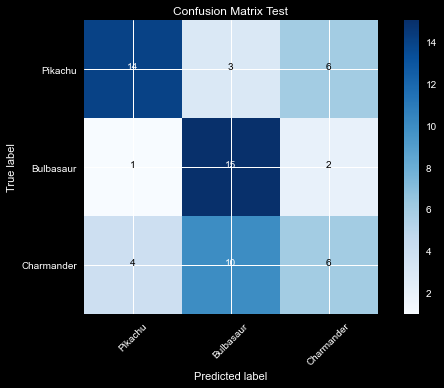

In [28]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Charmander"],title="Confusion Matrix Test")

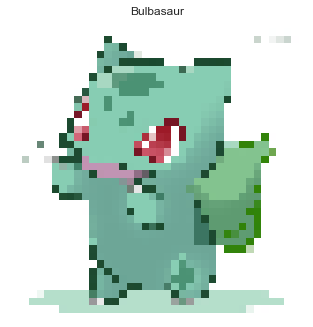

Prediction 98 Charmander


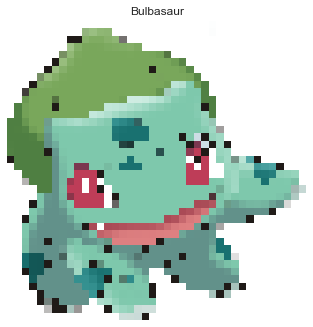

Prediction 114 Pikachu


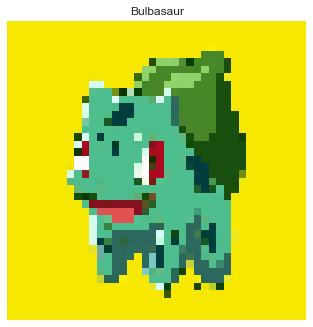

Prediction 194 Pikachu


In [30]:
## Misclassifications
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))